In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
  name : str
  age  : str
  final : str

def first_node(state: AgentState) -> AgentState:
  """This is the first node in the sequence"""
  state['final'] = f"Hi {state['name']}"
  return state

def second_node(state: AgentState) -> AgentState:
  """This is the second node in the sequence"""
  state['final'] = state['final'] + f" You are {state['age']} years old!"
  return state

In [3]:
graph = StateGraph(AgentState)

graph.add_node('first_node', first_node)
graph.add_node('second_node', second_node)

graph.set_entry_point('first_node')
graph.add_edge('first_node', 'second_node')
graph.set_finish_point('second_node')

app = graph.compile()

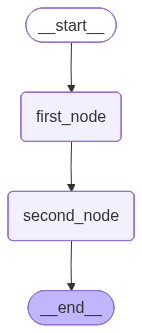

In [4]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({'name':'Sri Harsha', 'age':'23'})
result

{'name': 'Sri Harsha',
 'age': '23',
 'final': 'Hi Sri Harsha You are 23 years old!'}

#### Exercise

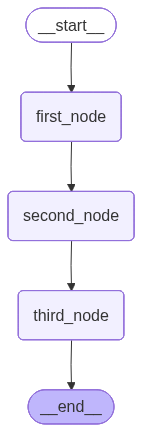

In [6]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
  name : str
  age : int
  skills : List[str]
  final : str

def first_node(state: AgentState) -> AgentState:
  """This is the first node in the sequence"""
  state['final'] = f"{state['name']}, Welcome to the System!"
  return state

def second_node(state: AgentState) -> AgentState:
  """This is the second node in the sequence"""
  state['final'] = state['final'] + f" You are {state['age']} years old!"
  return state

def third_node(state: AgentState) -> AgentState:
  """This is the third node in the sequence"""
  state['final'] = state['final'] + f" You have skills in {", ".join(state['skills'])}"
  return state


graph = StateGraph(AgentState)

graph.add_node('first_node', first_node)
graph.add_node('second_node', second_node)
graph.add_node('third_node', third_node)

graph.set_entry_point('first_node')
graph.add_edge('first_node', 'second_node')
graph.add_edge('second_node', 'third_node')
graph.set_finish_point('third_node')

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({'name':'Sri Harsha', 'age':23, 'skills':['Python', 'Machine Learning', 'LanGraph']})
result['final']

'Sri Harsha, Welcome to the System! You are 23 years old! You have skills in Python, Machine Learning, LanGraph'